### This exercise tries to address the high cardinality issue of the "gname" variable. 

### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

### Data preparation and preprocessing

The dataset was downloaded as an excel spreadsheet from the GTD website, uploaded into Pandas and then we carry out some data wrangling and preprocessing.

In [3]:
file= r'globalterrorismdb_0617dist.xlsx'
df= pd.read_excel(file)

In [4]:
df.shape

(170350, 135)

In [5]:
#restrict this dataset to occurrences in the US.
df1= df['country_txt'].str.contains('United States')
df2= df[df1]
df2.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


In [6]:
df2.shape

(2758, 135)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 2.9+ MB


In [8]:
df2.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate            2721
extended                 0
resolution            2746
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
latitude                 1
longitude                1
specificity              0
vicinity                 0
location              1852
summary               1054
crit1                    0
crit2                    0
crit3                    0
doubtterr                0
alternative           2364
alternative_txt       2364
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
                      ... 
propextent            1191
propextent_txt        1191
propvalue             1840
propcomment           1748
ishostkid              176
nhostkid              2696
n

What we have above shows we have some missing values for some variables. We will need to address later later before modeling our dataset. 

### Descriptive statistics and exploratory data analysis (EDA)

** Descriptive Statistics **

Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [9]:
df2.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.758000e+03,2758.000000,2758.000000,2758.000000,2758.000000,2758.0,2758.0,2757.000000,2757.000000,2758.000000,...,8.000000e+00,1.0,1.0,0.0,38.000000,23.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,1.983206e+11,1983.142132,6.235678,15.279913,0.004714,217.0,1.0,36.685013,-91.845078,1.020667,...,8.212500e+05,20000.0,0.0,NaN,3.131579,-2.826087,-4.360406,-4.305294,0.075780,-3.916969
std,1.335005e+09,13.347349,3.396045,9.151050,0.068506,0.0,0.0,7.375534,21.866017,0.245246,...,1.726155e+06,NaN,NaN,NaN,1.562587,43.352312,4.630165,4.690839,0.603208,4.755616
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,217.0,1.0,17.966072,-157.858333,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971101e+11,1971.000000,3.000000,7.000000,0.000000,217.0,1.0,34.053490,-117.867834,1.000000,...,0.000000e+00,20000.0,0.0,NaN,2.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.978100e+11,1978.000000,6.000000,15.000000,0.000000,217.0,1.0,38.890370,-84.511981,1.000000,...,3.500000e+04,20000.0,0.0,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.992082e+11,1992.000000,9.000000,23.000000,0.000000,217.0,1.0,40.783060,-74.005941,1.000000,...,6.250000e+05,20000.0,0.0,NaN,4.000000,9.500000,0.000000,0.000000,0.000000,1.000000
max,2.016122e+11,2016.000000,12.000000,31.000000,1.000000,217.0,1.0,64.837778,105.270546,5.000000,...,5.000000e+06,20000.0,0.0,NaN,7.000000,92.000000,1.000000,1.000000,1.000000,1.000000


From the descriptive statistics above, one can tell the following:
1. the skewedness of each features by comparing the mean to the median (50% mark). Most of the variables, especially the dummy variables seem right skewed, but nothing really serious since variance is not overly high 
2. skewedness from #1 if any,  translate to some outliers in the distribution. This sometimes can affect results of the analysis, and may need further investigation.
3. the distribution of the datapoints. The greater the standard deviation ('std'), the more dispersed the datapoints are.

Note that the descriptive statistics above excludes the missing values and categorical variables. From the above we see that most of the variables are either slightly right or left skewed. This can also be seen in the plot of the histogram below.

One can delve deeper into each feature using the plots depending on the algorithms being used. Considering high dimensionality of the dataset, this will be very time consuming.  Since this analysis is primarily based on Random Forest (RF) and the believe that they are robust enough to cater for such deficiencies, i wouldn't spend much time on this now. All issues would be revisited if outcomes of model is not as expected.

** Initial EDA on all variables **

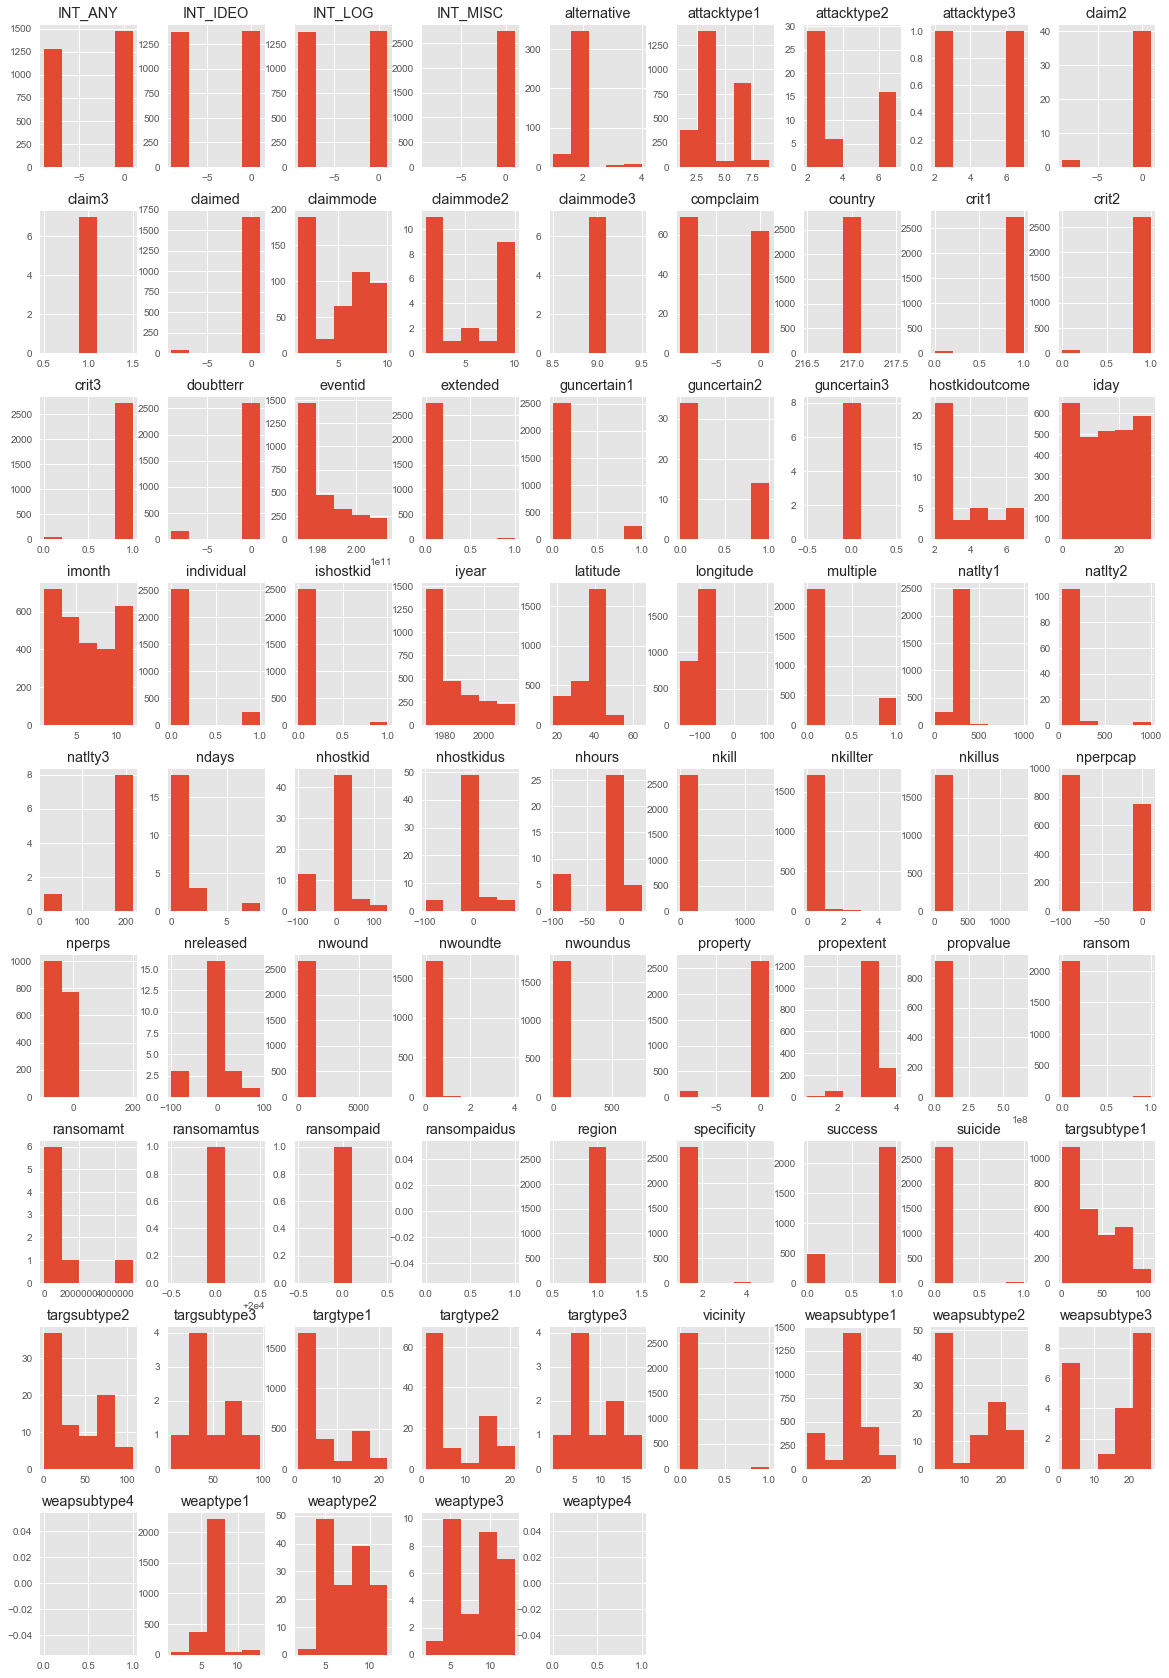

In [10]:
df2.hist(bins=5, figsize=(20,30))
plt.show()

Presence of skewness means that outliers are present in the variables affected as shown in the boxplots below. Outliers are not necessarily bad, but needs to be further investigating in relation to business objectives, required performance of the model and assumptions made about the dataset. Most times than not, this will need to be address if one is considering using a linear model to prevent negatively impacting outcomes of the model.

### Data Cleaning

Here, a class was created to help remove noisy columns that are either comments explaining what is in other columns or have more than 80% missing values.

In [11]:
class wr_ppro():
    '''Used for data wrangling and some initial preprocessing'''
    def __init__(self):
        ''''''
    def drop_col_nan(self, x, threshold):
        for col in x.columns:
            amt = sum(x[col].isnull())/float(len(x)) * 100
            if amt > threshold:
                x = x.drop(col,1)
                pd.set_option('display.max_columns', None)
        return x
        
    def drop_noisy_col(self, y, w=[]):
        y=y.drop(w, 1)
        return y
                
    def drop_col_txt(self, z):
        for c in z.columns:
            c = str(c)
            if c[-3:] =='txt':
                z = z.drop(c, 1)
                pd.set_option('display.max_columns', None)
        return z     
       

In [12]:
df3=wr_ppro().drop_col_nan(df2, 80)

In [13]:
df3.index = range(len(df2))

In [14]:
df4=wr_ppro().drop_col_txt(df3)

In [15]:
df5=wr_ppro().drop_noisy_col(df4, ['corp1', 'motive', 'target1', 'weapdetail','country','addnotes', 'summary', 'scite1' , 'scite2' , 'scite3' , 'dbsource','longitude','specificity', 'eventid', 'location','region', 'propcomment', 'latitude'])

In [16]:
df5.shape

(2758, 41)

In [17]:
df5.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
provstate          0
city               0
vicinity           0
crit1              0
crit2              0
crit3              0
doubtterr          0
multiple           0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1     120
natlty1            9
gname              0
guncertain1        0
individual         0
nperps           982
nperpcap        1055
claimed         1051
weaptype1          0
weapsubtype1     259
nkill             73
nkillus          953
nkillter        1004
nwound            93
nwoundus         973
nwoundte        1018
property           0
propextent      1191
propvalue       1840
ishostkid        176
ransom           588
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [18]:
df5.dtypes

iyear             int64
imonth            int64
iday              int64
extended          int64
provstate        object
city             object
vicinity          int64
crit1             int64
crit2             int64
crit3             int64
doubtterr         int64
multiple          int64
success           int64
suicide           int64
attacktype1       int64
targtype1         int64
targsubtype1    float64
natlty1         float64
gname            object
guncertain1     float64
individual        int64
nperps          float64
nperpcap        float64
claimed         float64
weaptype1         int64
weapsubtype1    float64
nkill           float64
nkillus         float64
nkillter        float64
nwound          float64
nwoundus        float64
nwoundte        float64
property          int64
propextent      float64
propvalue       float64
ishostkid       float64
ransom          float64
INT_LOG           int64
INT_IDEO          int64
INT_MISC          int64
INT_ANY           int64
dtype: object

** Checking for outliers **

In [19]:
#df6.columns
df5.columns


Index(['iyear', 'imonth', 'iday', 'extended', 'provstate', 'city', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'propextent', 'propvalue',
       'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

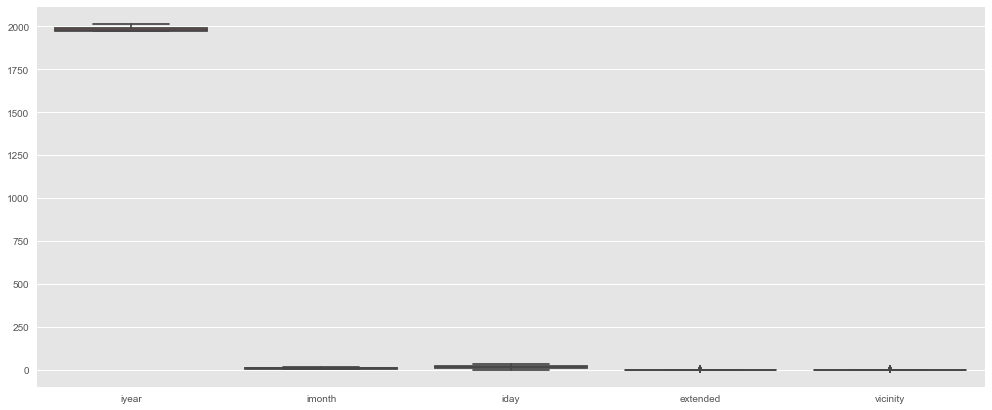

In [20]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['iyear', 'imonth', 'iday', 'extended', 'provstate', 'city', 'vicinity']])

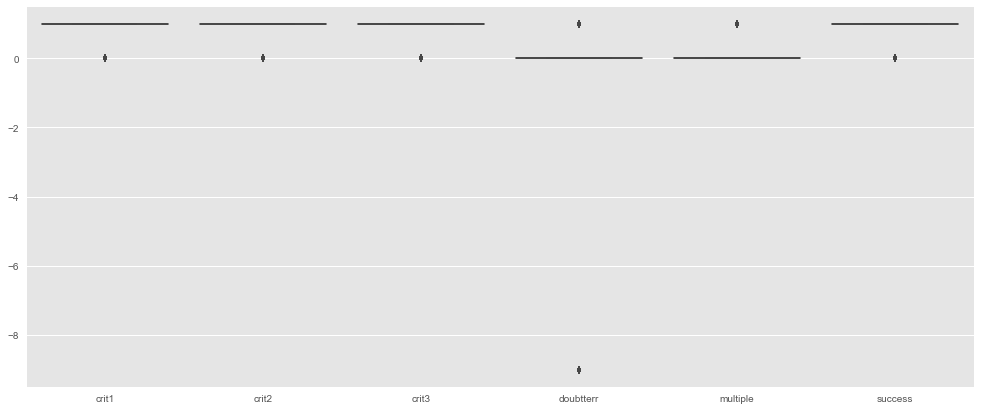

In [21]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success']])

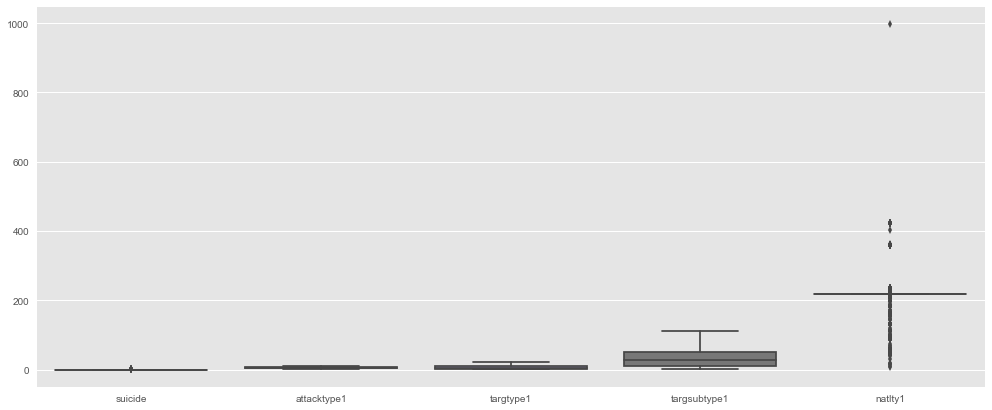

In [22]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1']])

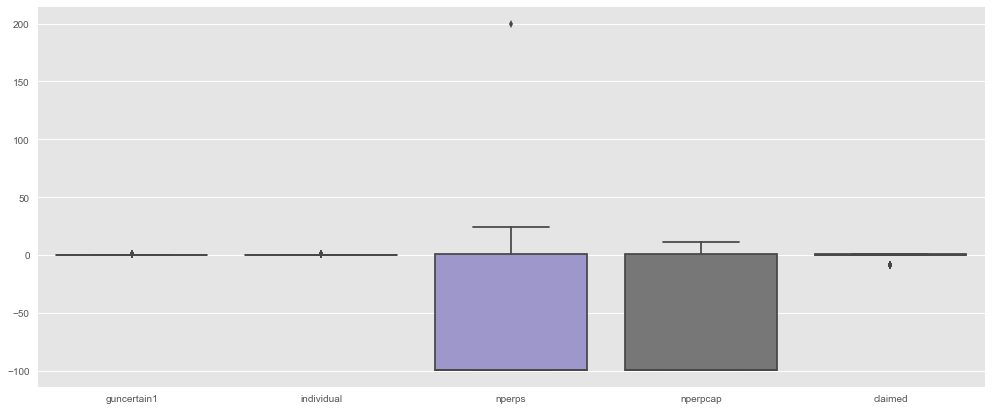

In [23]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed']])

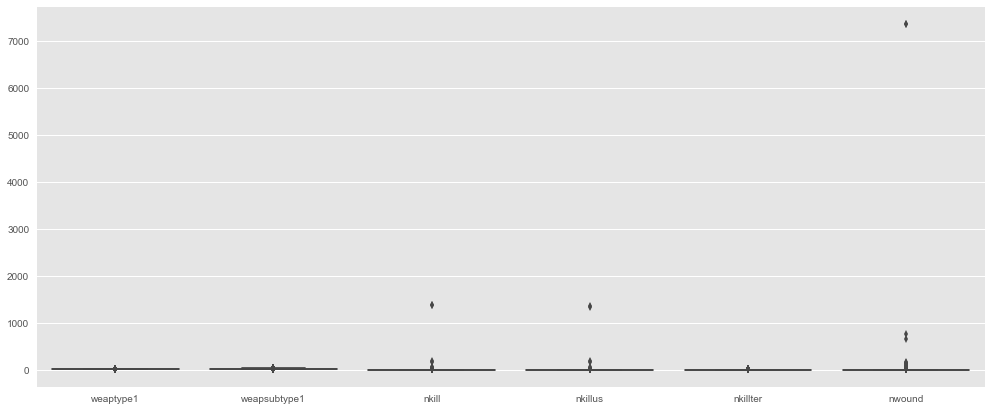

In [24]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['weaptype1', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound']])

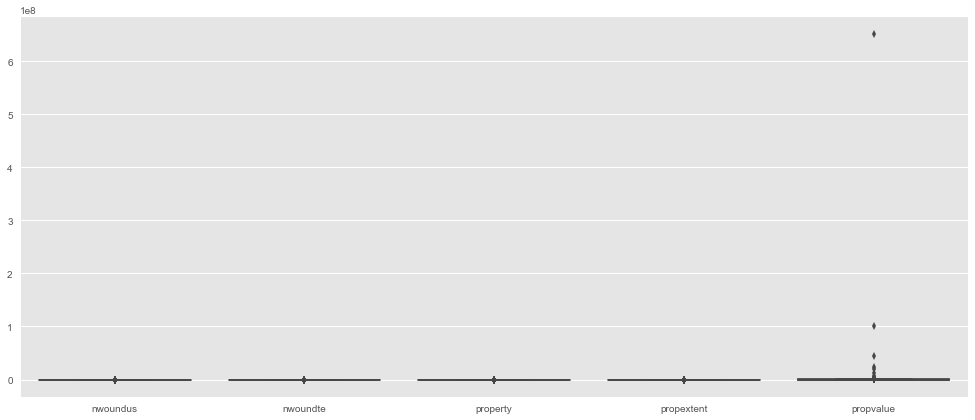

In [25]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['nwoundus', 'nwoundte', 'property', 'propextent', 'propvalue']])

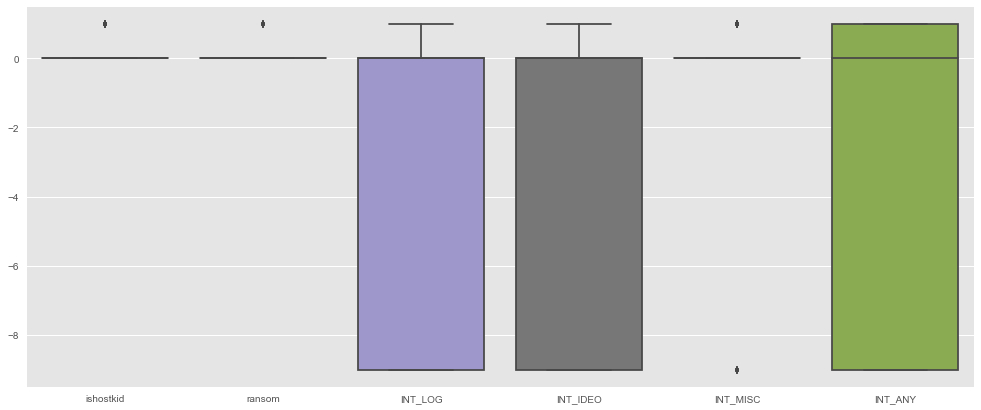

In [26]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df5[['ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']])

The dataset contains outliers, most notable "propvalue", "natlty1", "natlty1", "nperps", "nkill", "nkillus"and "nwound." Please refer to Codebook for meaning of the variables. And this causes skweness in the distribution of variables as seen in some of the plots above. These could have been an issue if we are considering linear models like Linear or Logistic Regression models. One would need to examine these issues closely and correct for such before building the model. Outliers are not necessarily bad. It depends on business needs and how much accuracy one is trying to achieve  Since I am considering non-linear models like the Random Forest, these issues are usually implicitly addressed. That is a big advantage of using such models. I decided to leave them in there to see how the model perform with an option of revisiting them if the outcome is not favorable. 

** Analyzing the Categorical Variables **

What i am looking for here is checking if the feature can be readily used in machine learning algorithms or needs much rework. By that, i mean having either even or closely uniform class sizes in the feature to allow an equal representation chance of each class in the train and test dataset. I am also looking at the cardinality of the feature and a possibility of any of the classes dominating the analysis (overfitting).

In [27]:
#this shows high cardinality in the dataset with uneven classes, and is usually an issue when building machine learning models.
#re-engineering of the feature is needed, else you are looking at cases of the model overfitting the dominant classes or having 
#somes examples in the train set missing in the test set depending on the size of the chosen sample after running the 
#train-test-split. the latter case also causes uneven features in the train set compared to the validation test after 
#categorical features are hotcoded, hence causing issues with for machine learning algorithms. So, i am dropping this for now 
#till the feature is re-engineered with probably some domain knowledge

df5['provstate'].value_counts()

California              586
New York                504
Puerto Rico             247
Florida                 153
Illinois                110
Washington               98
District of Columbia     83
Oregon                   65
Texas                    59
Massachusetts            57
Ohio                     51
New Jersey               47
Colorado                 44
Michigan                 44
Virginia                 39
Wisconsin                37
Missouri                 36
Maryland                 34
Arizona                  34
North Carolina           31
Pennsylvania             31
Georgia                  29
New Mexico               24
Minnesota                24
Iowa                     23
Nebraska                 23
Tennessee                22
Indiana                  21
Utah                     20
Louisiana                18
Connecticut              17
Nevada                   16
Alabama                  15
Oklahoma                 15
Idaho                    14
Kansas              

In [28]:
# with 705 classes, this is worse than what we had in the 'provstate' feature. Since city is already implied in state, and one 
#may not have large variance amongst cities in a state, I will drop the 'city' variable and see how our model performs.  
df5['city'].value_counts()

New York City       449
San Juan            115
Los Angeles         109
San Francisco        98
Miami                85
Washington           84
Chicago              56
Seattle              39
Berkeley             33
San Diego            22
Denver               22
Portland             21
Oakland              20
Boston               18
San Jose             18
Houston              17
Rio Piedras          17
Kansas City          17
Albuquerque          16
Sacramento           16
Unknown              15
Detroit              15
Phoenix              14
Cairo                12
Atlanta              12
Eugene               12
Arlington            12
Carolina             12
Fresno               11
Palo Alto            11
                   ... 
Los Altos Hills       1
Littleton             1
Escanaba              1
Reisterstown          1
Tupelo                1
Lockland              1
Milpitas              1
Buffalo               1
Fort Smith            1
Seven Corners         1
Cherry Hill     

In [29]:
df5.gname.value_counts()

Unknown                                                 552
Anti-Abortion extremists                                198
Left-Wing Militants                                     169
Fuerzas Armadas de Liberacion Nacional (FALN)           120
New World Liberation Front (NWLF)                        86
Black Nationalists                                       82
White extremists                                         79
Animal Liberation Front (ALF)                            75
Jewish Defense League (JDL)                              74
Student Radicals                                         71
Earth Liberation Front (ELF)                             66
Omega-7                                                  54
Weather Underground, Weathermen                          45
Macheteros                                               37
Black Liberation Army                                    36
Anti-Government extremists                               33
Chicano Liberation Front                

### Feature Engineering

Here, i tried to address high cardinality issues for the 'provstate'. Taking a look at the 'provstate' and the 'city' feature we see of the 'Recipient_State' feature by re-engineering it into a regions. The new feature was called 'state_region,' and the original state feature dropped afterward

In [30]:
#created a dictionary of key-value pair mapping the regions to all the states
region = {'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 
                        'New York', 'Pennsylvania'],
          'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Missouri', 
                    'Nebraska', 'North Dakota', 'South Dakota'],
          'South': ['Louisiana', 'Oklahoma', 'Texas', 'Delaware', 'District of Columbia', 'Maryland', 'Virginia', 
                    'West Virginia', 'Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 
                    'South Carolina', 'Tennessee'],
          'West':  ['Arkansas', 'Idaho', 'Oregon', 'Washington', 'Colorado', 'Montana', 'Utah', 'Wyoming', 'New Mexico',
                    'Arizona', 'California', 'Hawaii', 'Nevada', 'Alaska', 'Arizona', ],
          'Others': ['Puerto Rico', 'Unknown',]}

In [31]:
#for loop that did the job of the mapping
new = []
for state in df5.copy()['provstate']:
    for k, y in region.items():
        if state in y:
            new.append(k)

In [32]:
#creation of the new feature
df5['state_region'] = new

In [33]:
#dropping the old feature
df6=df5.drop(['provstate',], axis=1)

In [34]:
df6.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [35]:
df6.shape

(2758, 41)

In [36]:
df6['state_region'].value_counts()

West         919
Northeast    677
South        518
Midwest      396
Others       248
Name: state_region, dtype: int64

*** Using clustering to try regrouping 'gname' into fewer groups ***

In [37]:
from kmodes.kprototypes import KPrototypes
from matplotlib import style
#style.use("ggplot")
#colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [38]:
df6.new= df6.copy().replace(-99, -9)
#df6.new2 = df6.new.replace(-99, -9).reset_index()

C:\Users\dejavu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [39]:
df6.new.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-9.0,-9.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [40]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [41]:
df6_new2 = DataFrameImputer().fit_transform(df6.new)
df6_new2.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-9.0,-9.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,-9,-9,0,-9,Midwest
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,0,0,0,0,Midwest
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,-9.0,-9.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest


In [42]:
gname_list= df6.copy()['gname'].values.tolist()
others_list = df6_new2.drop('gname', axis=1).values.tolist()
#others_list = df6_new2.values.tolist()

In [43]:
gname_array = np.array(gname_list)
others_array = np.array(others_list)

In [44]:
gname_array

array(['Black Nationalists', 'Unknown', "New Year's Gang", ..., 'Unknown',
       'Unknown', 'Anti-Semitic extremists'], dtype='<U72')

In [45]:
others_array[0]

array(['1970', '1', '1', '0', 'Cairo', '0', '1', '1', '1', '0', '0', '1',
       '0', '2', '3', '22.0', '217.0', '0.0', '0', '-9.0', '-9.0', '0.0',
       '5', '5.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1', '3.0',
       '5000.0', '0.0', '0.0', '-9', '-9', '0', '-9', 'Midwest'],
      dtype='<U21')

In [47]:
kproto = KPrototypes(n_clusters=6, init='Cao', n_init=5, verbose=1) #init='Huang'
clusters = kproto.fit_predict(others_array, categorical=[4,5, 6, 7, 8, 9, 10, 11, 12,
                                                         13,14,15,16,17,18,19,20,23,24,25,30,31,33,
                                                         34,35,36,37,38,39])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

In [48]:
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

[array([[1.99400000e+03, 6.33333333e+00, 1.06666667e+01, 0.00000000e+00,
        6.66666667e-01, 7.33333333e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.96666667e+07],
       [1.99500000e+03, 4.00000000e+00, 1.90000000e+01, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+00, 0.00000000e+00, 6.50000000e+02,
        6.50000000e+02, 0.00000000e+00, 6.52000000e+08],
       [1.99096154e+03, 6.26923077e+00, 1.70769231e+01, 3.84615385e-02,
        3.84615385e-01, 7.46153846e+00, 0.00000000e+00, 3.84615385e-01,
        2.30769231e-01, 0.00000000e+00, 2.12101746e+06],
       [1.98301102e+03, 6.23026074e+00, 1.52673522e+01, 4.40690415e-03,
        2.97466030e-02, 6.59823724e+00, 2.27690048e-02, 6.40286449e+00,
        7.12449504e-01, 1.21189864e-02, 2.52636148e+04],
       [2.00275000e+03, 8.75000000e+00, 1.67500000e+01, 0.00000000e+00,
        2.50000000e-01, 8.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.50000000e

In [49]:
for s, c in zip(gname_array, clusters):
    print("Result: {}, cluster:{}".format(s, c))

Result: Black Nationalists, cluster:3
Result: Unknown, cluster:3
Result: New Year's Gang, cluster:3
Result: New Year's Gang, cluster:3
Result: Weather Underground, Weathermen, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Armed Commandos of Liberation, cluster:2
Result: Black Nationalists, cluster:3
Result: Strikers, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Student Radicals, cluster:3
Result: White extremists, cluster:3
Result: Strikers, cluster:3
Result: White extremists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Black Nationalists, cluster:3
Result: Left-Wing Militants, cluster:3
Result: White extremists, cluster:3
Result: Strikers, cluster:3
Result: Strikers, cluster:3
Result: Student Radicals, cluster:3
Result: Unknown, cluster:3
Result: Left-Wing Militants, cluster:3
Result: Black Nationalis

Result: Jewish Defense League (JDL), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: Black Liberation Army, cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Black Liberation Army, cluster:3
Result: May 19 Communist Order, cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: May 19 Communist Order, cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Vietnamese Organization to Exterminate Communists and Restore the Nation, cluster:3
Result: United Freedom Front (UFF), cluster:3
Result: Jamaat-al-Fuqra, cluster:3
Result: Jamaat-al-Fuqra, cluster:3
Result: The Order (Silent Brotherhood), cluster:3
Result: Anti-Abortion extremists, cluster:3
Result: Unknown, cluster:3
Result: Army of God, cluster:3
Res

In [50]:
result = zip(gname_array, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)              

[('Macheteros', 0), ('Earth Liberation Front (ELF)', 0), ('Earth Liberation Front (ELF)', 0), ('Anti-Government extremists', 1), ('Armed Commandos of Liberation', 2), ('Student Radicals', 2), ('Black Nationalists', 2), ('Black Nationalists', 2), ("New Year's Gang", 2), ('Weather Underground, Weathermen', 2), ('Unknown', 2), ('Omega-7', 2), ('The Order (Silent Brotherhood)', 2), ('Anti-Abortion extremists', 2), ('Mormon Extremist', 2), ('Animal Liberation Front (ALF)', 2), ('Anti-Government Group', 2), ('Animal Liberation Front (ALF)', 2), ('Animal Liberation Front (ALF)', 2), ('Anti-Environmentalists', 2), ('Animal Liberation Front (ALF)', 2), ('Animal Liberation Front (ALF)', 2), ('Earth Liberation Front (ELF)', 2), ('Earth Liberation Front (ELF)', 2), ('Animal Liberation Front (ALF)', 2), ('Earth Liberation Front (ELF)', 2), ('Coalition to Save the Preserves (CSP)', 2), ('Earth Liberation Front (ELF)', 2), ('Unknown', 2), ('Unknown', 2), ('Black Nationalists', 3), ('Unknown', 3), ("N

In [51]:
sub_df = pd.DataFrame(sortedR, columns=['reworked_gname', 'new_gname'])

In [52]:
sub_df.head()

,reworked_gname,new_gname
0,Macheteros,0
1,Earth Liberation Front (ELF),0
2,Earth Liberation Front (ELF),0
3,Anti-Government extremists,1
4,Armed Commandos of Liberation,2


In [53]:
sub_df['new_gname'].value_counts()

3    2723
2      26
4       4
0       3
5       1
1       1
Name: new_gname, dtype: int64

Looking at the above, we see that k-prototype clustering may not work at this time because the classes shown above are still very imbalanced and fall the risk of introducing bias. We probably need more data or further domain knowledge to help regroup this feature to fewer classes. Till then, I am leaving this feature out of our analysis.

In [54]:
df6['new_gname'] = sub_df['new_gname']

In [55]:
df6.head()

,iyear,imonth,iday,extended,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,state_region,new_gname
0,1970,1,1,0,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,-9,0,-9,Midwest,0
1,1970,1,2,0,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,-9,0,-9,West,0
2,1970,1,2,0,Madison,0,1,1,1,0,0,1,0,7,4,28.0,217.0,New Year's Gang,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0,0,Midwest,0
3,1970,1,3,0,Madison,0,1,1,1,0,0,1,0,7,2,21.0,217.0,New Year's Gang,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,0,0,0,0,Midwest,1
4,1970,1,1,0,Baraboo,0,1,1,0,1,0,0,0,3,4,27.0,217.0,"Weather Underground, Weathermen",0.0,0,NaN,NaN,NaN,6,16.0,0.0,NaN,NaN,0.0,NaN,NaN,0,3.0,0.0,0.0,0.0,0,0,0,0,Midwest,2
